# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [41]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [45]:
y = y.reshape(len(y),1)

In [46]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [48]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [49]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [50]:
y = y.reshape(len(y),)

In [51]:
y

array([-0.72004253, -0.70243757, -0.66722767, -0.59680786, -0.49117815,
       -0.35033854, -0.17428902,  0.17781001,  0.88200808,  2.64250325])

## Training the SVR model on the whole dataset

In [52]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR()

## Predicting a new result

In [65]:
inputData = sc_X.transform([[6.5]])
inputData

array([[6.5]])

In [66]:
inputData

array([[6.5]])

In [67]:
out = regressor.predict(inputData)

In [68]:
out

array([0.01158103])

In [69]:
sc_y.inverse_transform([regressor.predict(inputData)])

array([[252789.13921624]])

## Visualising the SVR results

In [92]:
sc_X.inverse_transform(X)

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

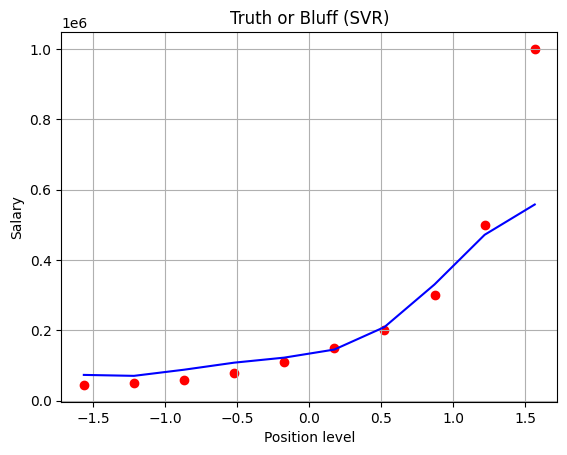

In [86]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y.reshape(1,-1)), color = 'red')
plt.plot(sc_X.inverse_transform(X), (sc_y.inverse_transform([regressor.predict(X)])).reshape(-1,1), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.grid()
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

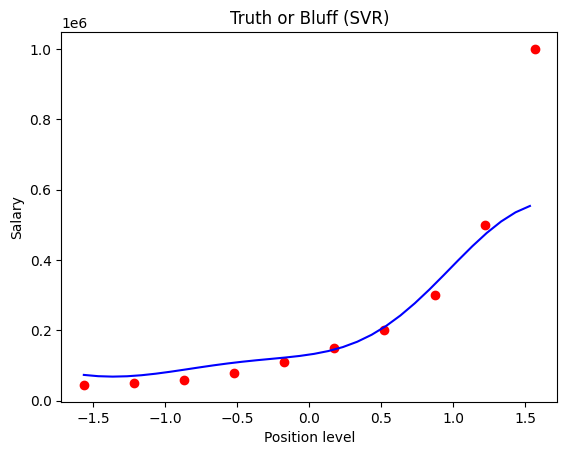

In [91]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y.reshape(1,-1)), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform([regressor.predict(sc_X.transform(X_grid))]).reshape(-1,1), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()